In [1]:
!pip install pandas
!pip install statsmodels

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [4]:
quakes = pd.read_csv('Zemletryasenie.csv', index_col=0)

In [6]:
quakes.head()

,x
1,-143
2,-114
3,4609
4,7309
5,3372


In [7]:
quakes.describe()

,x
count,3048.000000
mean,2645.605643
std,7697.898862
min,-34522.000000
25%,-959.250000
50%,2588.500000
75%,6151.500000
max,42428.000000


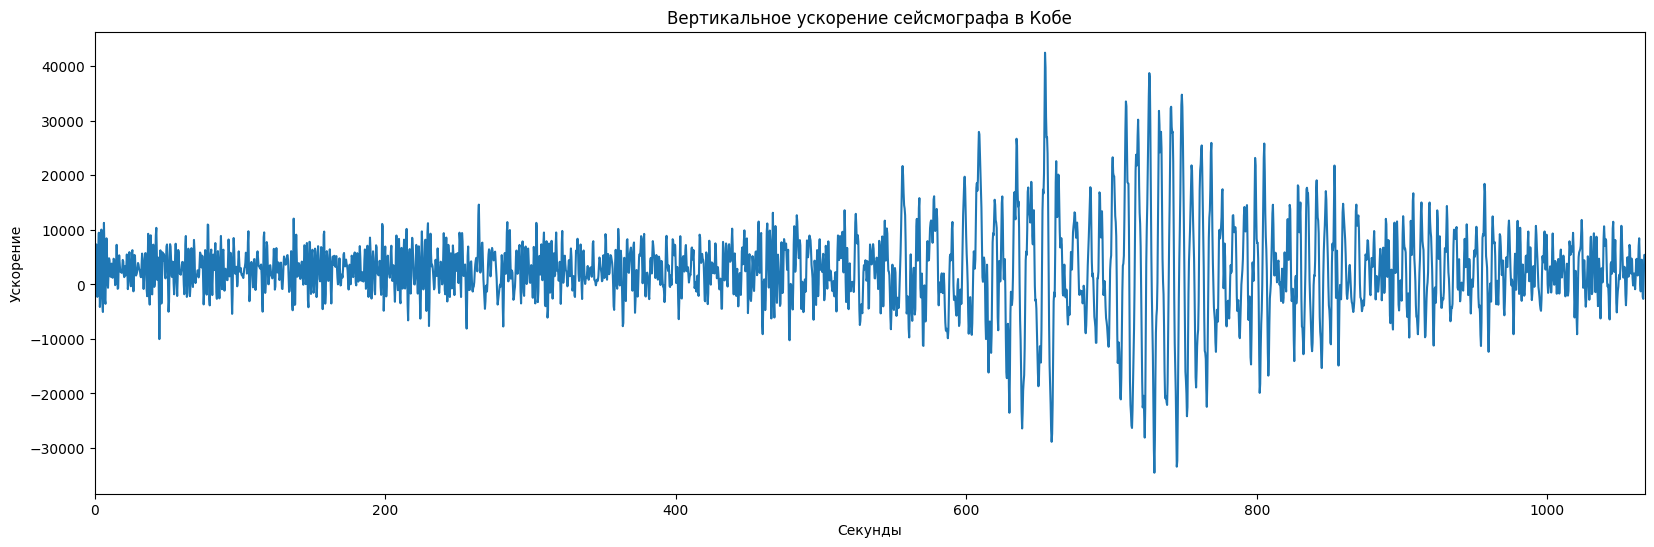

In [9]:
time_axis = np.linspace(0, 1067, len(quakes["x"]))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, quakes["x"].fillna(quakes["x"].mean()))

# заголовки
plt.title('Вертикальное ускорение сейсмографа в Кобе')
plt.xlabel('Секунды')
plt.ylabel('Ускорение')

# команда на отрисовку
plt.xlim(0, 1067)
plt.show()

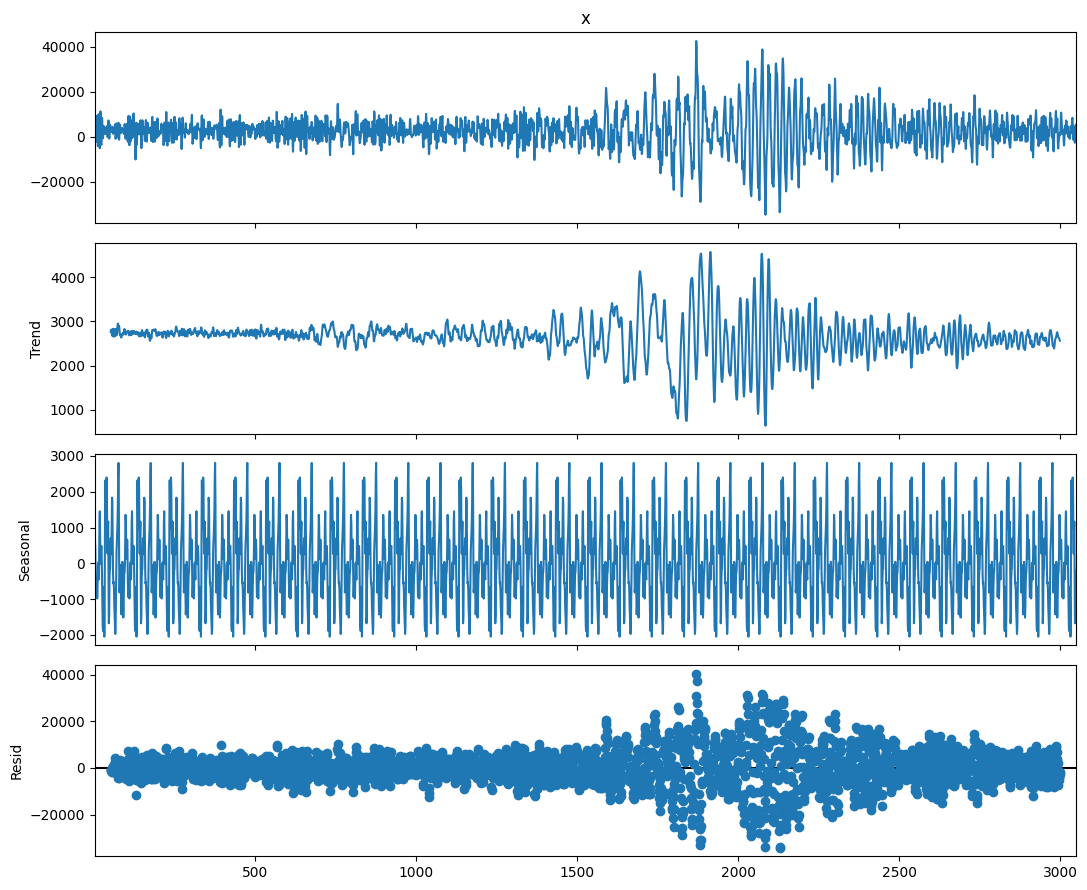

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9


# применяем функцию к данным о продажах
decompose = seasonal_decompose(quakes["x"], period=100)
decompose.plot()
plt.show()

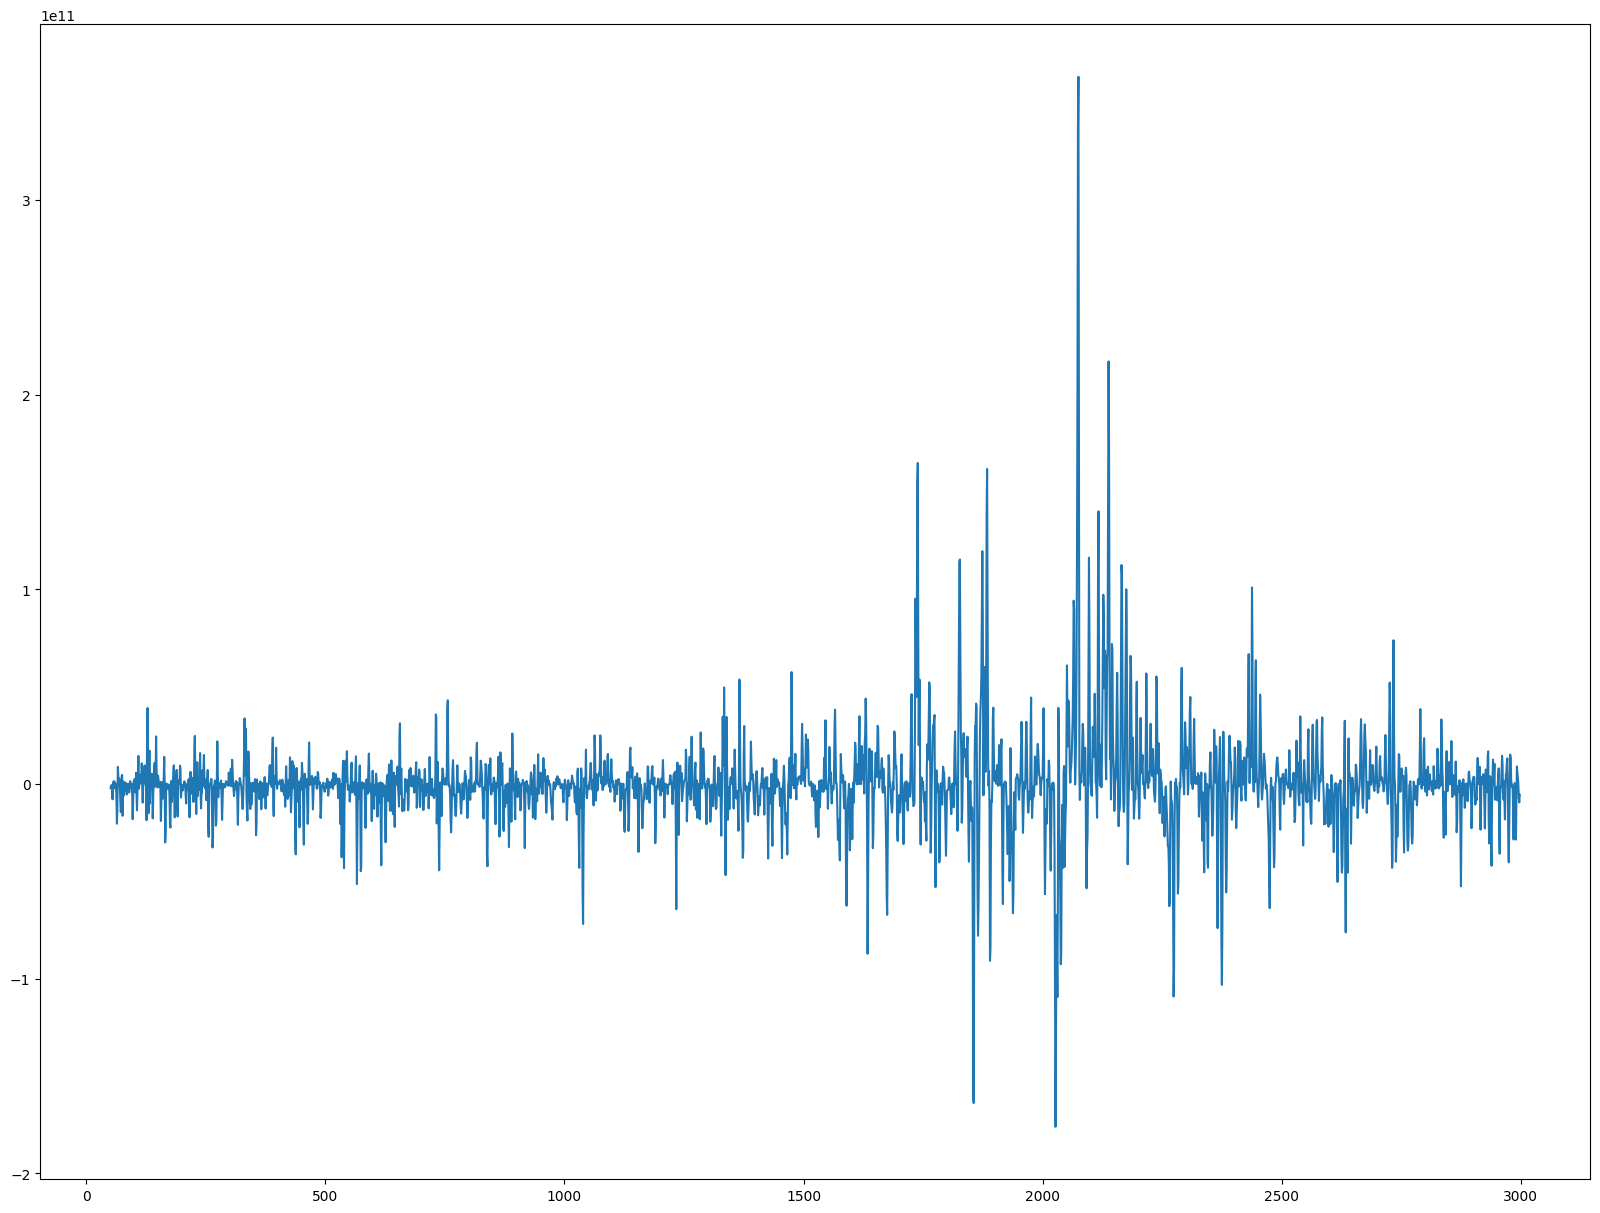

In [16]:
new_ps = decompose.trend*(decompose.seasonal+1)*decompose.resid

fig, axs = plt.subplots(figsize=(20, 15))

plt.plot(new_ps)
plt.show()

<Axes: >

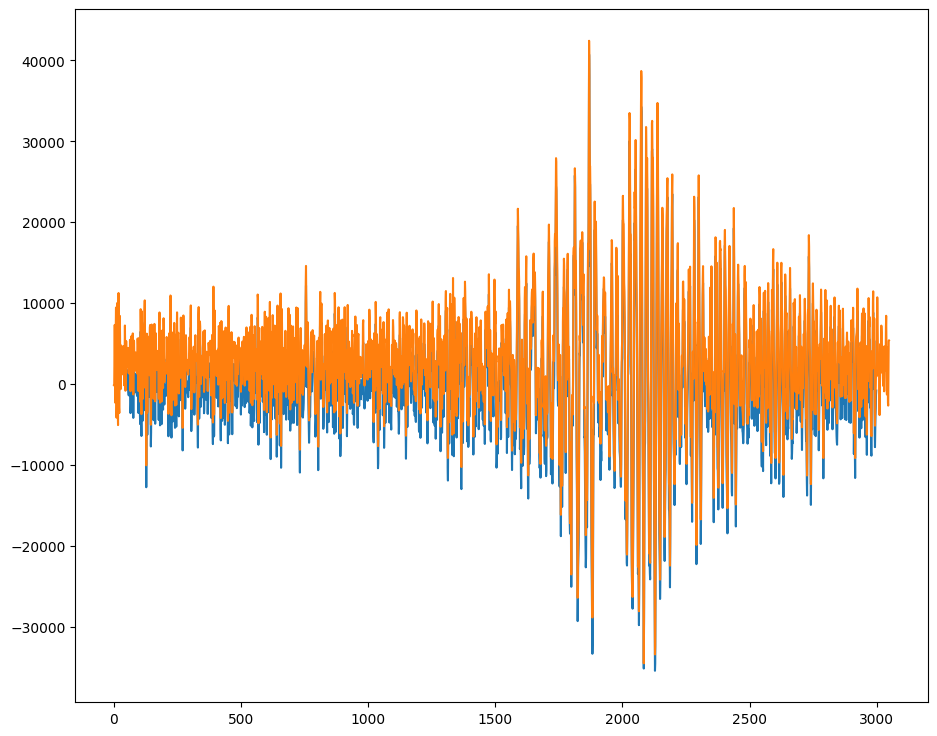

In [17]:
# удаляем компонент тренда из временного ряда...
quakes_r = quakes["x"] - decompose.trend
# ...и отрисовываем обработанный и исходный ряды
quakes_r.plot()
quakes["x"].plot()

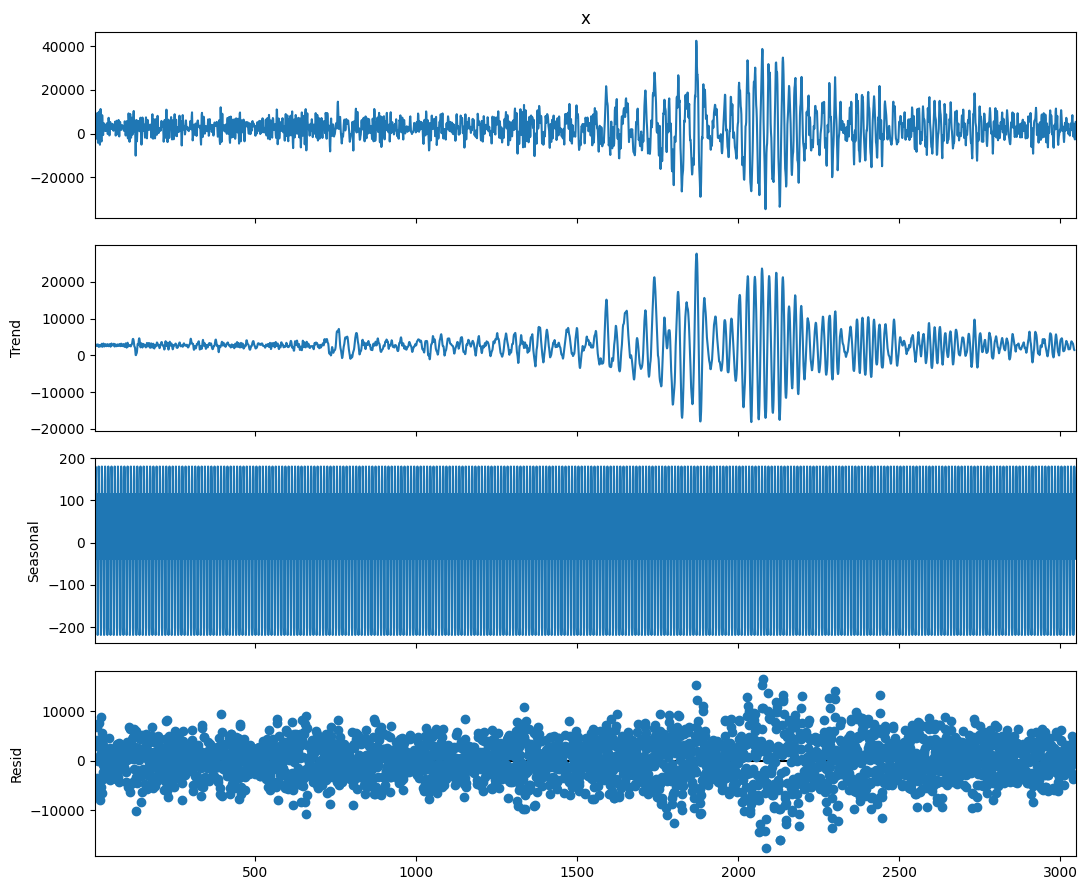

In [19]:
# разложение на составляющие продажи
decompose = seasonal_decompose(quakes["x"], period=10, model="additive")
decompose.plot()
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

alpha = 0.05
name = "Ускорение"
ts = quakes["x"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha * 100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда Ускорение :
Test Statistic                -1.498033e+01
p-value                        1.164672e-27
#Lags Used                     2.800000e+01
Number of Observations Used    3.019000e+03
Critical Value (1%)           -3.432518e+00
Critical Value (5%)           -2.862498e+00
Critical Value (10%)          -2.567280e+00
dtype: float64
Значение p меньше 5.0%. Ряд стационарный.


<ipython-input-22-f344fd7cfc96>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


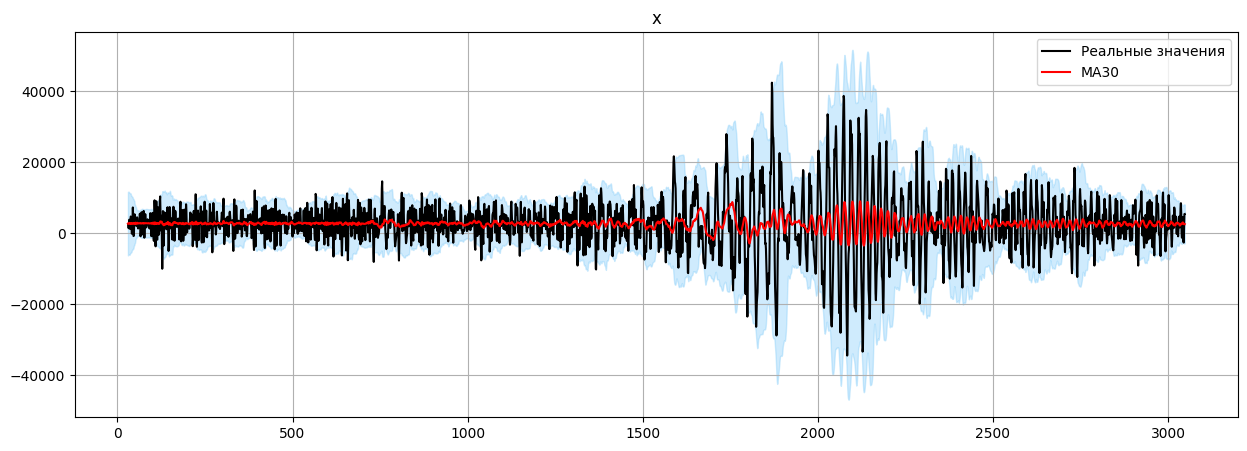

In [22]:
# указываем размер окна
window = 30

# вычисляем скользящее среднее и стандартное отклонение
rolling_mean = ts.rolling(window=window).mean()
rolling_std = ts.rolling(window=window).std()

plt.figure(figsize=(15,5))
plt.title(ts.name)
plt.plot(ts[window:], label='Реальные значения', color="black")

# отрисовываем скользящее среднее
plt.plot(rolling_mean, 'g', label='MA'+str(window),
             color="red")

# отрисовываем верхний и нижний интервалы
lower_bound = rolling_mean - (1.96 * rolling_std)
upper_bound = rolling_mean + (1.96 * rolling_std)

plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                 color='lightskyblue', alpha=0.4)
plt.legend(loc='best')
# показываем сетку на графике
plt.grid(True)
plt.show()

<Figure size 1200x700 with 0 Axes>

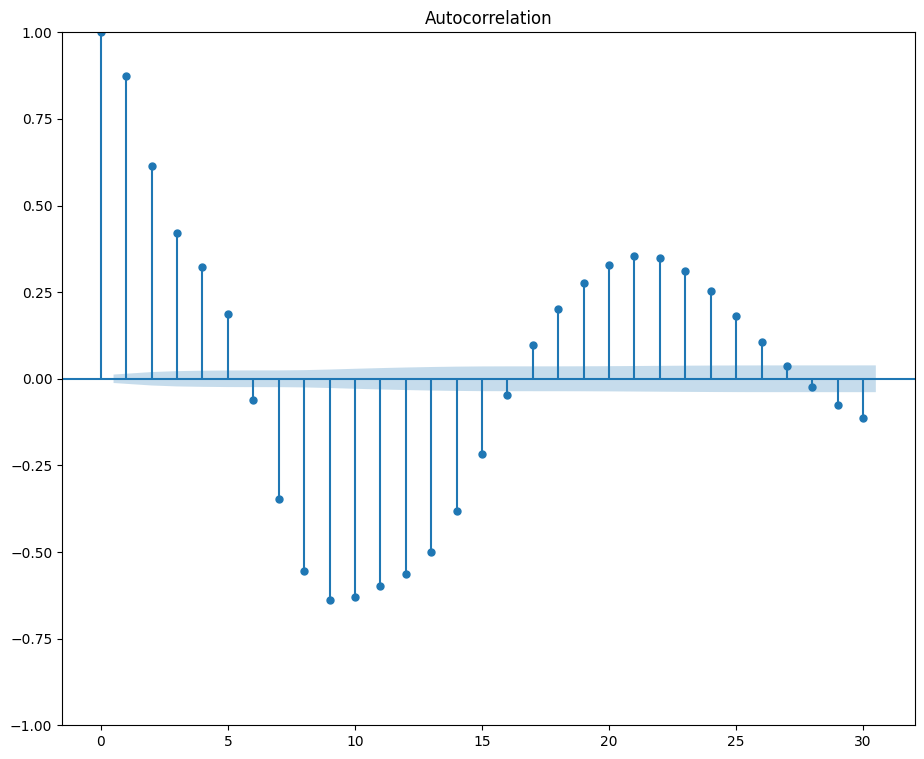

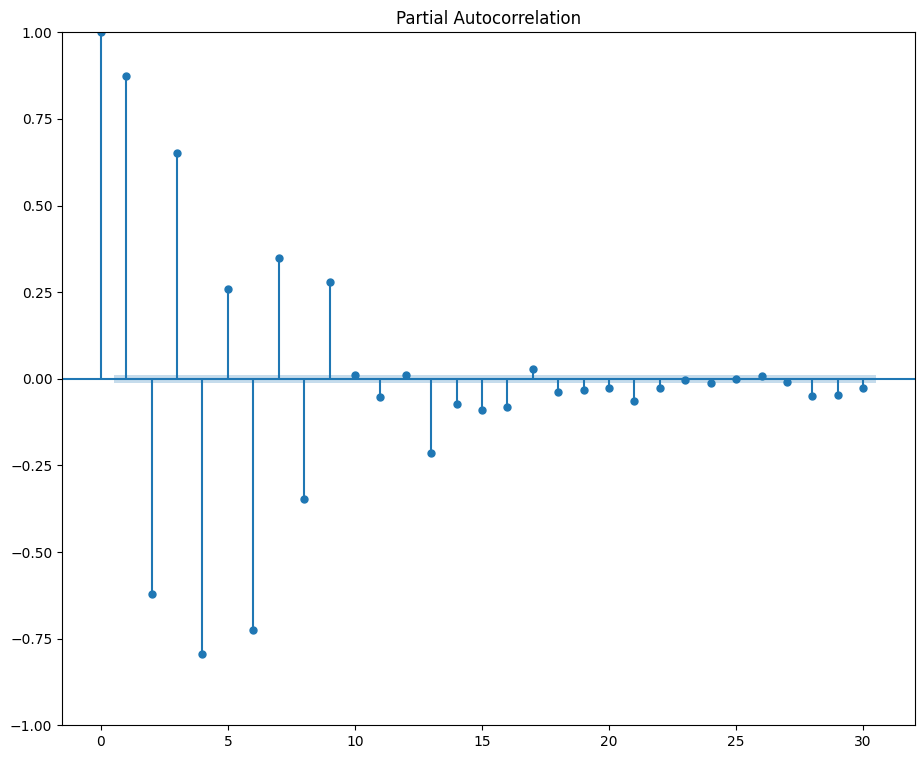

In [23]:
import statsmodels.tsa.api as smt
fig = plt.figure(figsize=(12, 7))
ac_plot = smt.graphics.plot_acf(ts, lags=30, alpha=0.5)
pac_plot = smt.graphics.plot_pacf(ts, lags=30, alpha=0.5)

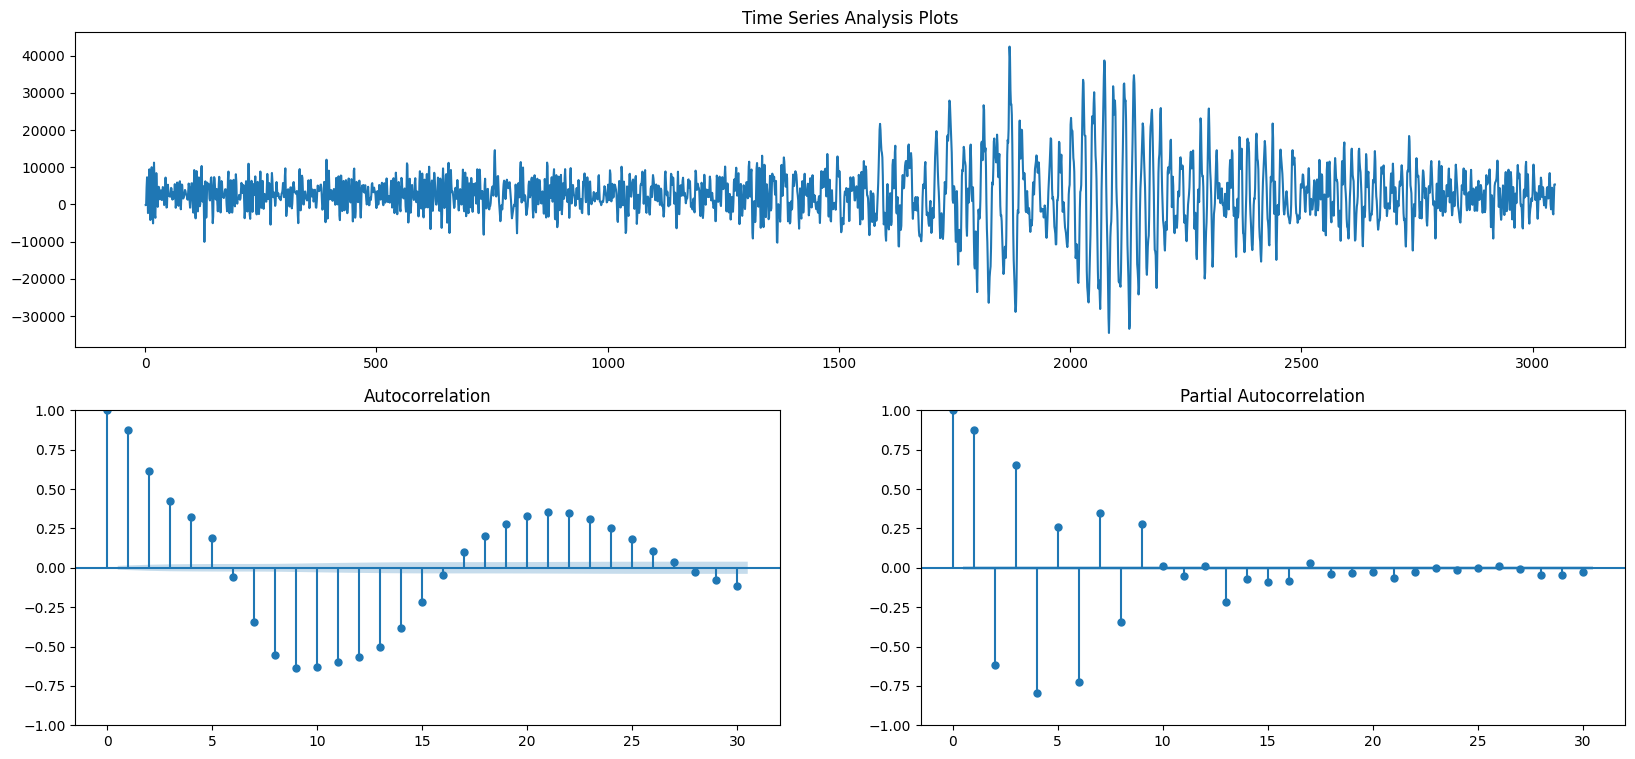

In [24]:
fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=30, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=30, ax=pacf_ax, alpha=0.5)
None